<center>
</center>


# Контрольная работа :)

In [33]:
import numpy as np
import pandas as pd

from scipy import stats

import seaborn as sns
import matplotlib.pyplot as plt
from scipy. stats import norm

plt.style.use('ggplot') # стиль для графиков
%matplotlib inline

COLLAB = False

В файле `cr.csv` лежат результаты контрольной работы, которая проводилась в Вышке на факультете "Э".  По мнению студентов эти оценки смещённые, несостоятельные и ужасно неэффективные. Но это уже совершенно другая история. Подгрузим файлик и посмотрим на него!  

In [34]:
if COLLAB:
    from google.colab import drive
    drive.mount('/content/gdrive')
    df = pd.read_csv('/content/gdrive/MyDrive/DA/3/3/cr.csv', sep='\t')
else:
    df = pd.read_csv('cr.csv', sep='\t')

print(df.shape)
display(df.head())

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
(389, 20)


,contest_login,fraud,k1a,k1b,k1c,k1d,k1e,k1f,k1,k2a,k2b,k2c,k2d,k2e,k2f,k2,k3a,k3b,k3c,k3
0,eds_python_2020_1,0.0,10.0,10.0,20.0,30.0,4.0,22.0,10.1,20.0,10.0,20.0,20.0,20.0,20.0,11.0,35.0,0.0,27.0,6.2
1,eds_python_2020_2,1.0,9.0,10.0,20.0,NaN,16.0,12.0,6.7,NaN,5.0,NaN,20.0,20.0,20.0,6.5,35.0,29.0,22.0,8.6
2,eds_python_2020_3,0.0,2.0,10.0,20.0,NaN,20.0,30.0,8.2,20.0,5.0,NaN,20.0,20.0,20.0,8.5,28.0,2.0,0.0,3.0
3,eds_python_2020_4,1.0,10.0,10.0,20.0,NaN,16.0,14.0,7.0,20.0,10.0,NaN,20.0,20.0,20.0,9.0,30.0,38.0,0.0,6.8
4,eds_python_2020_5,2.0,10.0,10.0,12.0,0.0,16.0,22.0,7.0,20.0,10.0,NaN,20.0,20.0,20.0,9.0,0.0,0.0,0.0,0.0


__Описание колонок:__


* `contest_login` - уникальный идентификатор студента
* `fraud` - в списывании скольки задач был уличён студент 
* `k1` - результат за первую контрольную, `k1a - k1f` в разбивке по задачам
* `k2` - результат за вторую контрольную, `k2a - k2f` в разбивке по задачам
* `k3` - результат за третью контрольную, `k3a - k3с` в разбивке по задачам

__а) Распределение результатов контрольной__ 

- Запишите все оценки за первую контрольную в переменную `x`, все пропуски удалите
- Найдите среднее и стандартное отклонение (используйте несмещённую оценку) 
- Постройте гистограмму результатов за первую контрольную 
- На этой же картинке постройте плотность нормального распределения со средним и стандартным отклонением, посчитанными выше

Похоже ли эмпирическое распределение на нормальное? 

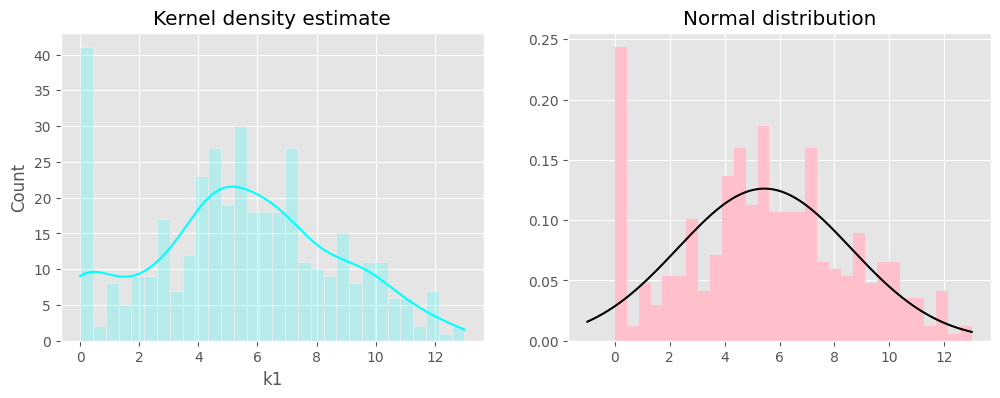

In [46]:
x = df.loc[:,"k1"]
x = x.dropna()
x_mean = x.mean()
x_std = x.std(ddof=1)

fig, axes = plt.subplots(1,2, figsize = (12,4))
title = ["Kernel density estimate", "Normal distribution"]
color = ["cyan", "pink"]

for i in [0,1]:
    if i == 0:
        sns.histplot(x, bins = 30, kde = True, color = color[i], alpha=0.2, ax = axes[i]).set(title=title[i])
    else:
        x.hist(bins=30,density = True,  color = color[i], ax = axes[i])
        xs = np.linspace(-1, 13, 300)
        ys = stats.norm(loc = x_mean, scale = x_std).pdf(xs)
        axes[i].set_title(title[i])
        plt.plot(xs, ys, color="black");
plt.show()

**ОТВЕТ:** Да, эмпирическое распределение похоже на нормальное

In [ ]:
# проверка, что среднее и стандартное откланение посчитаны корректно
assert np.abs(x_mean - 5.4478149100) < 1e-5

По аналогии с тем, как это было сделано на лекции, проверьте с помощью теста Колмогорова-Смирнова гипотезу о нормальности: 

- Используйте функцию `kstest` из пакета `scipy`
- С помощью `.pvalue` вытащите из результатов теста p-значение, запишите его в переменную `pvalue`
- По аналогии запишите в `K` значение статистики Колмогорова
- Если p-значение оказалось больше $0.05$, гипотеза о нормальности данных не отвергается, и мы можем дальше использовать эту предпосылку

In [58]:
test = stats.kstest(x,"norm",args=(x_mean, x_std))
pvalue = test.pvalue
K = test.statistic

print("pvalue =", pvalue)
print("K =", K)

pvalue = 0.2500068105451755
K = 0.05124747789637904


**ОТВЕТ:** pvalue > 0.05,  гипотеза о нормальности данных не отвергается

In [51]:
# проверка, что pvalue найдено корректно
assert np.abs(K - 0.051247) < 1e-5

Предположим невероятное! А именно, независимость и одинаковую распределённость наших наблюдений (никто не списывал контрольную друг у друга).

__б) Интервал для среднего.__ 

Постройте точный $95\%$-й доверительный интервал для ожидамоего результата за первую контрольную. В качестве оценки стандартного отклонения используйте несмещённый вариант, `ddof=1`. В переменные `left` и `right` запишите границы получившегося интервала. В переменную `delta` его ширину. 

In [59]:
n =  x.size
t_rv = stats.t(n - 1)
alpha = 0.05 

t_crit = t_rv.ppf(1 - alpha/2)
var_hat = x.var(ddof = 1)

left = x_mean - t_crit * np.sqrt(var_hat / n)
right = x_mean + t_crit * np.sqrt(var_hat / n)                        
delta = right-left

print("left side =", left)
print("right side =", right)
print( "delta =", delta)

left side = 5.1324721374428055
right side = 5.7631576826086075
delta = 0.630685545165802


In [54]:
# проверка, что границы доверительного интервала найдены верно
assert np.abs(left - 5.13247213744281) < 1e-5

__в) Ангелы и демоны__

Переменная`fraud` - в списывании скольки задач был уличён студент. Разобьём наши наблюдения на две группы: Ангелы и Демоны. У Ангелов `fraud == 0`, у Демонов `fraud > 0`. 

Запишите оценки за первую контрольную для ангелов в переменную `angels`, для демонов в `demons`. Все пропуски из выборки удалите. Постройте на общем фоне гистограмму распределения оценок за первую контрольную у Ангелов и Демонов. 

In [78]:
angels = df[df.fraud == 0].k1.dropna()
demons = df[df.fraud > 0].k1.dropna()

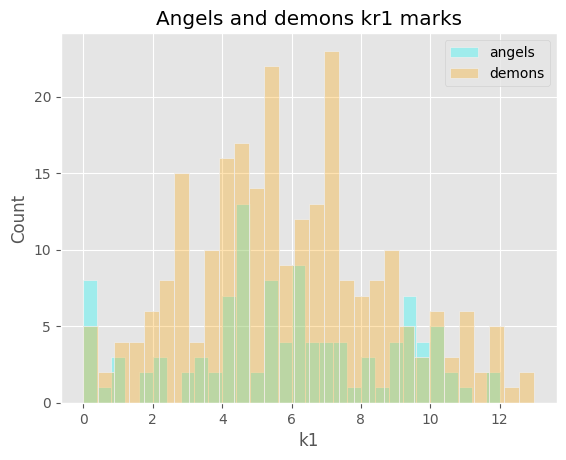

In [93]:
fig, ax = plt.subplots()

color = ["cyan", "orange"]
labels = ["angels", "demons"]
for i, x in enumerate([angels, demons]):
    sns.histplot(x, bins=30, color = color[i],alpha = 0.3, ax=ax, label=labels[i])
ax.set(title = "Angels and demons kr1 marks",  )
ax.legend()
plt.show()

In [67]:
# проверка того, сколько в выборке оказалось ангелов и демонов
assert len(angels) == 109

__г) Интервал для разницы средних__ 

Постройте примерный $95\%$-й доверительный интервал для разницы ожидаемого результата за первую контрольную у Ангелов и Демонов без предположения о равенстве дисперсий (интервал Уэлча). Для оценки всех дисперсий используйте несмещённый вариант. Заполните все переменные, перечисленные ниже. 

In [94]:
diff = angels.mean() - demons.mean()
nx, ny = angels.size, demons.size
diff_sd = np.sqrt(angels.var(ddof=1)/nx + demons.var(ddof=1)/ny)

u = (angels.var(ddof=1) / nx + demons.var(ddof=1) / ny) ** 2
d = (angels.var(ddof=1)**2) / (nx**2 * (nx - 1)) + (demons.var(ddof=1)**2)/ (ny**2* (ny - 1))
nu =  u/d 

left, right = stats.t.interval(0.95, df=nu, loc=diff, scale=diff_sd)
delta = right - left     

print("left side =", left)
print("right side =", right)
print( "delta =", delta)

left side = -0.8045581262764355
right side = 0.5469728051755166
delta = 1.3515309314519521


In [95]:
# проверка, что границы доверительного интервала найдены верно
assert np.abs(left + 0.8045581262764373) < 1e-5

Входит ли в получившийся доверительный интервал ноль? Как думаете, что это означает? 

**ОТВЕТ:** Да, ноль входит в доверительный интервал, что означет, что мы не отвергаем гипотезу о равенстве средних

__д) Интервал для дисперсии__ 

Предположим, что математическое ожидание результата за контрольную зависит от уровня подготовки, а дисперсия результата — от нервов. Постройте для отношения нервозности Демонов и Ангелов $95\%$ доверительный интервал. Для оценки всех дисперсий используйте несмещённый вариант. 

In [99]:
alpha = 0.05

x = angels
y = demons

n, m = x.size - 1, y.size - 1
sn, sm = x.var(ddof=1), y.var(ddof=1)

left =  sm / sn * stats.f(n, m).ppf(alpha/2)
right = sm / sn * stats.f(n, m).ppf(1 - alpha/2)
delta = right-left
print("left side =", left)
print("right side =", right)
print( "delta =", delta)

left side = 0.6120428247687729
right side = 1.1623835577954729
delta = 0.5503407330267


In [98]:
# проверка, что границы доверительного интервала найдены верно
assert np.abs(left - 0.6120428247687726) < 1e-5

Вошла ли в доверительный интервал единица? Как думаете, что это означает? 

**ОТВЕТ:** Да, единица входит в доверительный интервал, что означет, что мы не 
отвергаем гипотезу о равенстве дисперсий.

__е) Ангелы и демоны решают задачки__ 

Нарисуйте картинку для корреляционной матрицы по задачам первой контрольной для всех наблюдений, отдельно для Ангелов и Демонов. Пропуски заполните нулями. Будем считать, что если у студента нет оценки, он не выполнял это задание. Для подсчёта корреляций используйте метод `.corr`. Для отрисовки матриц функцию `heatmap` из пакета `seaborn`. Для ангелов неплохо подойдёт цветовая схема `YlGnBu`. Для демонов подходит схема `gist_heat_r`.

In [100]:
tasks = ['k1a', 'k1b', 'k1c', 'k1d', 'k1e', 'k1f']
angels = df[df.fraud == 0][tasks].fillna(0)
demons = df[df.fraud > 0][tasks].fillna(0)

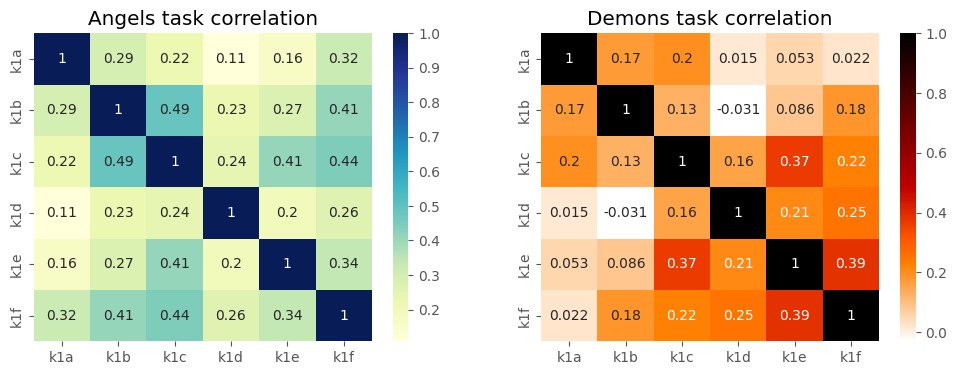

In [102]:
from matplotlib.cm import ColormapRegistry
fig, axes = plt.subplots(1,2, figsize = (12,4))
title = ["Angels task correlation", "Demons task correlation"]
colormap = ["YlGnBu", 'gist_heat_r']

for i, x in enumerate([angels,demons]):
    sns.heatmap(x.corr(), cmap=colormap[i], ax=axes[i], annot=True).set(title = title[i])
plt.show()

Между баллом за какие задачи самая высокая корреляция у Ангелов? В грейдер отправьте название колонок в порядке возрастания через запятую. __Например:__ `("k1a", "k1f")`. 

In [ ]:
top_corr_angels = ("k1b", "k1c")
top_corr_demons = ("k1e", "k1f")

Как думаете, какие задачи было тяжелее всего списать? 

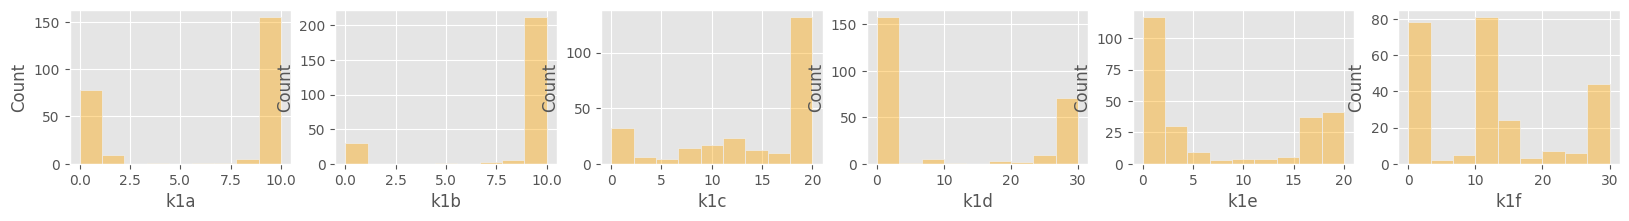

In [115]:
fig, axes = plt.subplots(1,6, figsize = (20,2))
for i, k in enumerate(tasks):
    sns.histplot(demons[k], ax = axes[i], alpha = 0.4, color = "orange")

**ОТВЕТ:** Похоже, что k1d и k1b

__ё) Доля написавших третью контрольную.__

Без буквы `ё` никуда, скажут нам [Пафнутий Чебышёв](https://ru.wikipedia.org/wiki/%D0%A7%D0%B5%D0%B1%D1%8B%D1%88%D1%91%D0%B2,_%D0%9F%D0%B0%D1%84%D0%BD%D1%83%D1%82%D0%B8%D0%B9_%D0%9B%D1%8C%D0%B2%D0%BE%D0%B2%D0%B8%D1%87) и [Лёв Толстой](https://arzamas.academy/special/ruslit/writers/tolstoy).  

У студентов был выбор: писать или не писать третью контрольную. Если в колонке `k3` стоит $0$, значит студент не стал это делать. Постройте асимптотический $95\%$-й доверительный интервал для разницы долей Ангелов и Демонов, которые решили писать третью контрольную. 

__Примечание:__ На практике, если мы пользуемся асимптотическими доверительными интервалами, мы можем искать границы двумя способами:

* __Первый__ состоит в том, что мы оцениваем стандартное отклонение с помощью $\sqrt{\hat{p} \cdot (1 - \hat{p})} = \sqrt{\frac{1}{n} \cdot \sum_{i=1}^n (x_i - \bar{x})^2}$. 
* __Второй способ__ состоит в том, чтобы оценить стандартное отклонение как  $\sqrt{\frac{1}{n-1} \cdot \sum_{i=1}^n (x_i - \bar{x})^2}$. 

В плане асимптотики это не влияет на выводы, так как обе этих оценки состоятельно оценивают дисперсию. Можно пользоваться любым. Однако, чтобы с грейдером не было проблем и задание зачлось, воспользуйтесь первым способом. 

In [120]:
na, nd = angels.shape[0], demons.shape[0]

angels_k3 = df[(df.fraud == 0)&(df.k3 != 0)]
demons_k3 =  df[(df.fraud > 0)&(df.k3 != 0)]
angels_mu_hat = angels_k3.shape[0] / na
demons_mu_hat = demons_k3.shape[0]/ nd
mu_hat = angels_mu_hat - demons_mu_hat

std_hat = np.sqrt(angels_mu_hat * (1 - angels_mu_hat)/na + demons_mu_hat * (1 - demons_mu_hat)/nd)

alpha = 0.05
left, right = stats.norm.interval(1 - alpha, loc = mu_hat, scale = std_hat)
delta = right-left
print("left side =", left)
print("right side =", right)
print( "delta =", delta)

left side = -0.1884946955049297
right side = 0.03341212669759032
delta = 0.22190682220252


In [ ]:
# проверка, что границы доверительного интервала найдены верно
assert np.abs(left + 0.1885) < 1e-3

Входит ли в доверительный интервал ноль? Как думаете, что это означает? 

**ОТВЕТ:** Да, ноль вошел в доверительный интервал, что означает, что мы не отвергаем гипотезу о равенстве средних для долей Ангелов и Демонов, которые писали третью контрольную

__ж) Снова разница средних__ 

Посмотрим на результаты студентов в динамике. Постройте точный $95\%$ доверительный интервал для средней разницы оценок за вторую и первую контрольные. Пропуски в данных заполните нулями. 

In [121]:
k1 = df['k1'].fillna(0)
k2 = df['k2'].fillna(0)
diff = k2 - k1

alpha = 0.05
t_rv = stats.t(k1.size - 1)
t_crit = t_rv.ppf(1 - alpha/2)

left = diff.mean() - t_crit * diff.std(ddof=1) / np.sqrt(diff.size)
right = diff.mean() + t_crit * diff.std(ddof=1)/np.sqrt(diff.size)
delta = right - left 
print("left side =", left)
print("right side =", right)
print( "delta =", delta)

left side = -1.4562881732820105
right side = -0.7072079706768586
delta = 0.749080202605152


In [122]:
# проверка, что границы доверительного интервала найдены верно
assert np.abs(left + 1.4562881732820103) < 1e-5

Входит ли в доверительный интервал ноль? Как думаете, что это означает? 

**ОТВЕТ:** Нет, ноль не вошел в доверительный интервал. В среднем, на уровне значимости 5%, оценки за первую контрольную были хуже, чем за вторую

Это домашка подошла к концу. Поздравляю! Теперь вы умеете строить точные доверительные интервалы для нормальных выборок.